# CSE 555 - Problem Set 3: Exact Inference with Probabilistic Graphical Models

<b> Upasana Ghosh </b> <br>
UB Person#: <b> 50317396 </b> <br>
Department of Computer Science <br>
University at Buffalo <br>
Buffalo, NY 14214 <br>
upasanag@buffalo.edu <br>


# Problem 1: 
Draw the moral graph, triangulated graph and the junction tree. Explain why the "running intersection property" is satisfied in your junction tree.

# Solution:

## Constructing the Model

In [24]:
# Importing the general dependencies and the Probabilistic Graphical Model libraries
import pgmpy
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defining the Probabilistic Graphical Model with the random and dependent variables
graphical_model_chest_clinic = BayesianModel([('asia', 'tub'),('bronc', 'dysp'),('either', 'xray'),('either', 'dysp'),
                                    ('lung', 'either'),('smoke', 'lung'),('smoke', 'bronc'),('tub', 'either')])

# Defining the parameters and assiciating them with the Model
asia = TabularCPD(variable='asia', variable_card = 2, values = [[0.01], [0.99]])
bronc = TabularCPD(variable='bronc', variable_card=2, values=[[0.6, 0.3], 
                                                              [0.4, 0.7]], evidence = ['smoke'], evidence_card = [2])
dysp = TabularCPD(variable='dysp', variable_card=2, values=[[0.9, 0.7, 0.8, 0.1], 
                                                              [0.1, 0.3, 0.2, 0.9]], evidence = ['bronc', 'either'], evidence_card = [2, 2])
either = TabularCPD(variable='either', variable_card=2, values=[[1, 1, 1, 0], 
                                                              [0, 0, 0, 1]], evidence = ['tub', 'lung'], evidence_card = [2, 2])
lung = TabularCPD(variable='lung', variable_card=2, values=[[0.1, 0.01], 
                                                              [0.9, 0.99]], evidence = ['smoke'], evidence_card = [2])
smoke = TabularCPD(variable='smoke', variable_card = 2, values = [[0.5], [0.5]])

tub = TabularCPD(variable='tub', variable_card=2, values=[[0.05, 0.01], 
                                                              [0.95, 0.99]], evidence = ['asia'], evidence_card = [2])
xray = TabularCPD(variable='xray', variable_card=2, values=[[0.98, 0.05], 
                                                              [0.02, 0.95]], evidence = ['either'], evidence_card = [2])

graphical_model_chest_clinic.add_cpds(asia, bronc, dysp, either, lung, smoke, tub, xray)


# Verifying the construction of the Model
print('\n======: VERIFYING THE CONSTRUCTED MODEL :======')
print('Check if asia and either is an active network?:', graphical_model_chest_clinic.is_active_trail('asia', 'either'))
print('Check if and bronc is an active network?:', graphical_model_chest_clinic.is_active_trail('asia', 'bronc'))
print('Check if and smoke is an active network?:', graphical_model_chest_clinic.is_active_trail('xray', 'smoke')) 
print('Check if either is observed from tub and xray?:', graphical_model_chest_clinic.is_active_trail('tub', 'xray', observed=['either']))
print('Check if either is observed from asia and bronc?:', graphical_model_chest_clinic.is_active_trail('asia', 'bronc', observed=['lung']))
print('Check if either is observed from tub and lung?:', graphical_model_chest_clinic.is_active_trail('tub', 'lung', observed=['either']))



======: VERIFYING THE CONSTRUCTED MODEL :======
Check if asia and either is an active network?: True
Check if and bronc is an active network?: False
Check if and smoke is an active network?: True
Check if either is observed from tub and xray?: False
Check if either is observed from asia and bronc?: False
Check if either is observed from tub and lung?: True


In [25]:
# Verifying the model by displaying the independencies
print('\n======: VERIFYING THE MODEL BY DISPLAYING THE INDEPENDENCIES :======')
print('Nodes independent of asia:', graphical_model_chest_clinic.local_independencies('asia'))
print('Nodes independent of tub:', graphical_model_chest_clinic.local_independencies('tub'))
print('Nodes independent of dysp:', graphical_model_chest_clinic.local_independencies('dysp'))


======: VERIFYING THE MODEL BY DISPLAYING THE INDEPENDENCIES :======
Nodes independent of asia: (asia _|_ bronc, smoke, lung)
Nodes independent of tub: (tub _|_ bronc, smoke, lung | asia)
Nodes independent of dysp: (dysp _|_ xray, lung, asia, smoke, tub | bronc, either)


## Drawing the Moral Graph, Triangulated Graph and the Junction Tree

======: EDGES IN THE BAYESIAN NETWORK MODEL :======
('asia', 'tub')
('tub', 'either')
('bronc', 'dysp')
('either', 'xray')
('either', 'dysp')
('lung', 'either')
('smoke', 'lung')
('smoke', 'bronc')

======: BAYESIAN NETWORK MODEL (GRAPH) :======


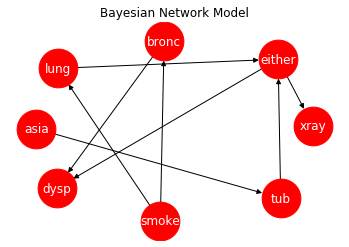

In [19]:
# Importing the dependencies
import networkx as nx
import pylab as plt

# Constructing the general Bayesian Network Model
print('======: EDGES IN THE BAYESIAN NETWORK MODEL :======')

# Printing the edges in the graph
for edge in graphical_model_chest_clinic.edges():
    print(edge)

# Drawing the Model
print('\n======: BAYESIAN NETWORK MODEL (GRAPH) :======')
plt.figure()
plt.title('Bayesian Network Model')
nx.draw(graphical_model_chest_clinic, with_labels=True, node_color='r', node_size=1500, font_size=12, font_color='white')
plt.savefig('bayesian_network_model.png')
plt.show()

======: EDGES IN THE MORALIZED GRAPH :======
('asia', 'tub')
('tub', 'either')
('tub', 'lung')
('either', 'bronc')
('either', 'dysp')
('either', 'xray')
('either', 'lung')
('lung', 'smoke')
('bronc', 'dysp')
('bronc', 'smoke')

======: MORALIZED BAYESIAN NETWORK MODEL (MORAL GRAPH) :======


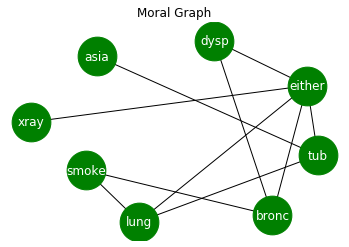

In [20]:
# Constructing the Moralized Bayesian Network Model
moral_graph = graphical_model_chest_clinic.to_markov_model()

# Printing the edges in the graph
print('======: EDGES IN THE MORALIZED GRAPH :======')
for edge in moral_graph.edges():
    print(edge)
    
# Drawing the Model
print('\n======: MORALIZED BAYESIAN NETWORK MODEL (MORAL GRAPH) :======')
plt.figure()
plt.title('Moral Graph')
nx.draw(moral_graph, with_labels=True, node_color='g', node_size=1500, font_size=12, font_color='white')
plt.savefig('moral_graph.png')
plt.show()

======: EDGES IN THE TRIANGULATED GRAPH :======
('asia', 'tub')
('asia', 'lung')
('asia', 'smoke')
('asia', 'xray')
('asia', 'either')
('tub', 'either')
('tub', 'lung')
('either', 'bronc')
('either', 'dysp')
('either', 'xray')
('either', 'lung')
('either', 'smoke')
('lung', 'smoke')
('lung', 'xray')
('bronc', 'dysp')
('bronc', 'smoke')
('dysp', 'smoke')
('xray', 'smoke')

======: TRIANGULATED VERSION OF MORALIZED BAYESIAN MODEL (TRIANGULATED GRAPH) :======


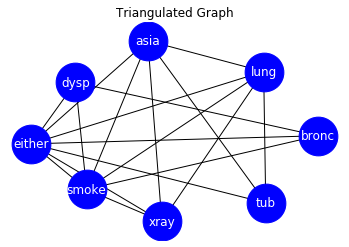

In [21]:
# Constructing the Triangulated version of the Moralized Bayesian Network Model
triangulated_graph = moral_graph.triangulate()

# Printing the edges in the graph
print('======: EDGES IN THE TRIANGULATED GRAPH :======')
for edge in triangulated_graph.edges():
    print(edge)

# Drawing the Model
print('\n======: TRIANGULATED VERSION OF MORALIZED BAYESIAN MODEL (TRIANGULATED GRAPH) :======')
plt.figure()
plt.title('Triangulated Graph')
nx.draw(triangulated_graph, with_labels=True, node_color='b', node_size=1500, font_size=12, font_color='white')
plt.savefig('triangulated_graph.png')
plt.show()

======: NODES IN THE JUNCTION TREE :======
('either', 'smoke', 'bronc', 'dysp')
('either', 'smoke', 'lung', 'asia', 'xray')
('either', 'tub', 'asia', 'lung')

======: EDGES IN THE JUNCTION TREE :======
(('either', 'smoke', 'bronc', 'dysp'), ('either', 'smoke', 'lung', 'asia', 'xray'))
(('either', 'smoke', 'lung', 'asia', 'xray'), ('either', 'tub', 'asia', 'lung'))


======: JUNCTION TREE FROM THE TRIANGULATED MODEL (JUNCTION TREE) :======


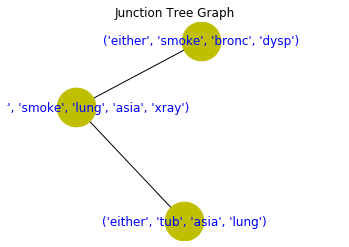

In [22]:
# Constructing the Junction Tree from the Triangulated Model
junction_tree = triangulated_graph.to_junction_tree()

# Printing the nodes in the graph
print('======: NODES IN THE JUNCTION TREE :======')
for node in junction_tree.nodes():
    print(node)

# Printing the edges in the graph
print('\n======: EDGES IN THE JUNCTION TREE :======')   
for edge in junction_tree.edges():
    print(edge)

# Drawing the Model
print('\n\n======: JUNCTION TREE FROM THE TRIANGULATED MODEL (JUNCTION TREE) :======')
pos = nx.spring_layout(junction_tree)   
plt.figure()
plt.title('Junction Tree Graph')
nx.draw(junction_tree, with_labels=True, node_color='y', node_size=1500, font_size=12, font_color='blue')
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.8
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.savefig('junction_tree.png')
plt.show()

## Running Intersection Property Satisfied (Explanation) 

The Running Intersection Property states that if a cluster C<sub>i</sub> and C<sub>j</sub> both contain the variable X, then all the clusters in the unique path between C<sub>i</sub> and C<sub>j</sub> should also contain X.
From our generated Junction tree, we have the following pair of cluster:
<br>
<b> {'either', 'smoke', 'bronc', 'dysp'} </b> and <b> {'either', 'tub', 'asia', 'lung'} </b>
<br><br>
The cluster found on the unique path between the pair of clusters is <br>
<b> {'either', 'smoke', 'lung', 'asia', 'xray'} </b>
<br><br>
The common nodes that exists in the cluster on the unique path and the selected pair of cluster, <br>
<b> {'either'} </b>
<br>

# Problem 2:
Describe how the different terms on the right hand side of "p(V ) = p(a)p(t | a)p(s)p(l | s)p(b | s)p(e | t, l)p(d | e, b)p(x | e)" are distributed among the different juction tree clusters. Write out the messages using these terms and verify that the message passing algorithm indeed gives the cluster marginals.

# Solution:

In [19]:
# Importing the dependencies
import IPython
from IPython.display import Image
from pgmpy.inference import VariableElimination

In [17]:
# Performing the Variable Elimination and querying the graphical model
graph_inference = VariableElimination(graphical_model_chest_clinic)
query = graph_inference.query(variables=['tub', 'lung','bronc'],evidence={'asia': 0, 'xray': 0},joint=True)

# Printing the Joint Probability
print('\n======: JOINT PROBABILITY FOR {tub, lung, bronc} GIVEN THE EVIDENCE {asia, xray} :======\n')
print(str(query))

Eliminating: smoke: 100%|██████████| 3/3 [00:00<00:00, 249.68it/s]



======: JOINT PROBABILITY FOR {tub, lung, bronc} GIVEN THE EVIDENCE {asia, xray} :======

+--------+----------+---------+-----------------------+
| tub    | bronc    | lung    |   phi(tub,bronc,lung) |
+========+==========+=========+=======================+
| tub(0) | bronc(0) | lung(0) |                0.0106 |
+--------+----------+---------+-----------------------+
| tub(0) | bronc(0) | lung(1) |                0.1413 |
+--------+----------+---------+-----------------------+
| tub(0) | bronc(1) | lung(0) |                0.0079 |
+--------+----------+---------+-----------------------+
| tub(0) | bronc(1) | lung(1) |                0.1778 |
+--------+----------+---------+-----------------------+
| tub(1) | bronc(0) | lung(0) |                0.2021 |
+--------+----------+---------+-----------------------+
| tub(1) | bronc(0) | lung(1) |                0.1370 |
+--------+----------+---------+-----------------------+
| tub(1) | bronc(1) | lung(0) |                0.1508 |
+--------+---

From above, we observe that the <b>Joint Probability of {'tub', 'lung', 'bronc'}</b> given the <b>evidence {asia, xray}</b> is: <br>
<b>0.0106</b>
<br>


## Cluster tree after variable elimination execution

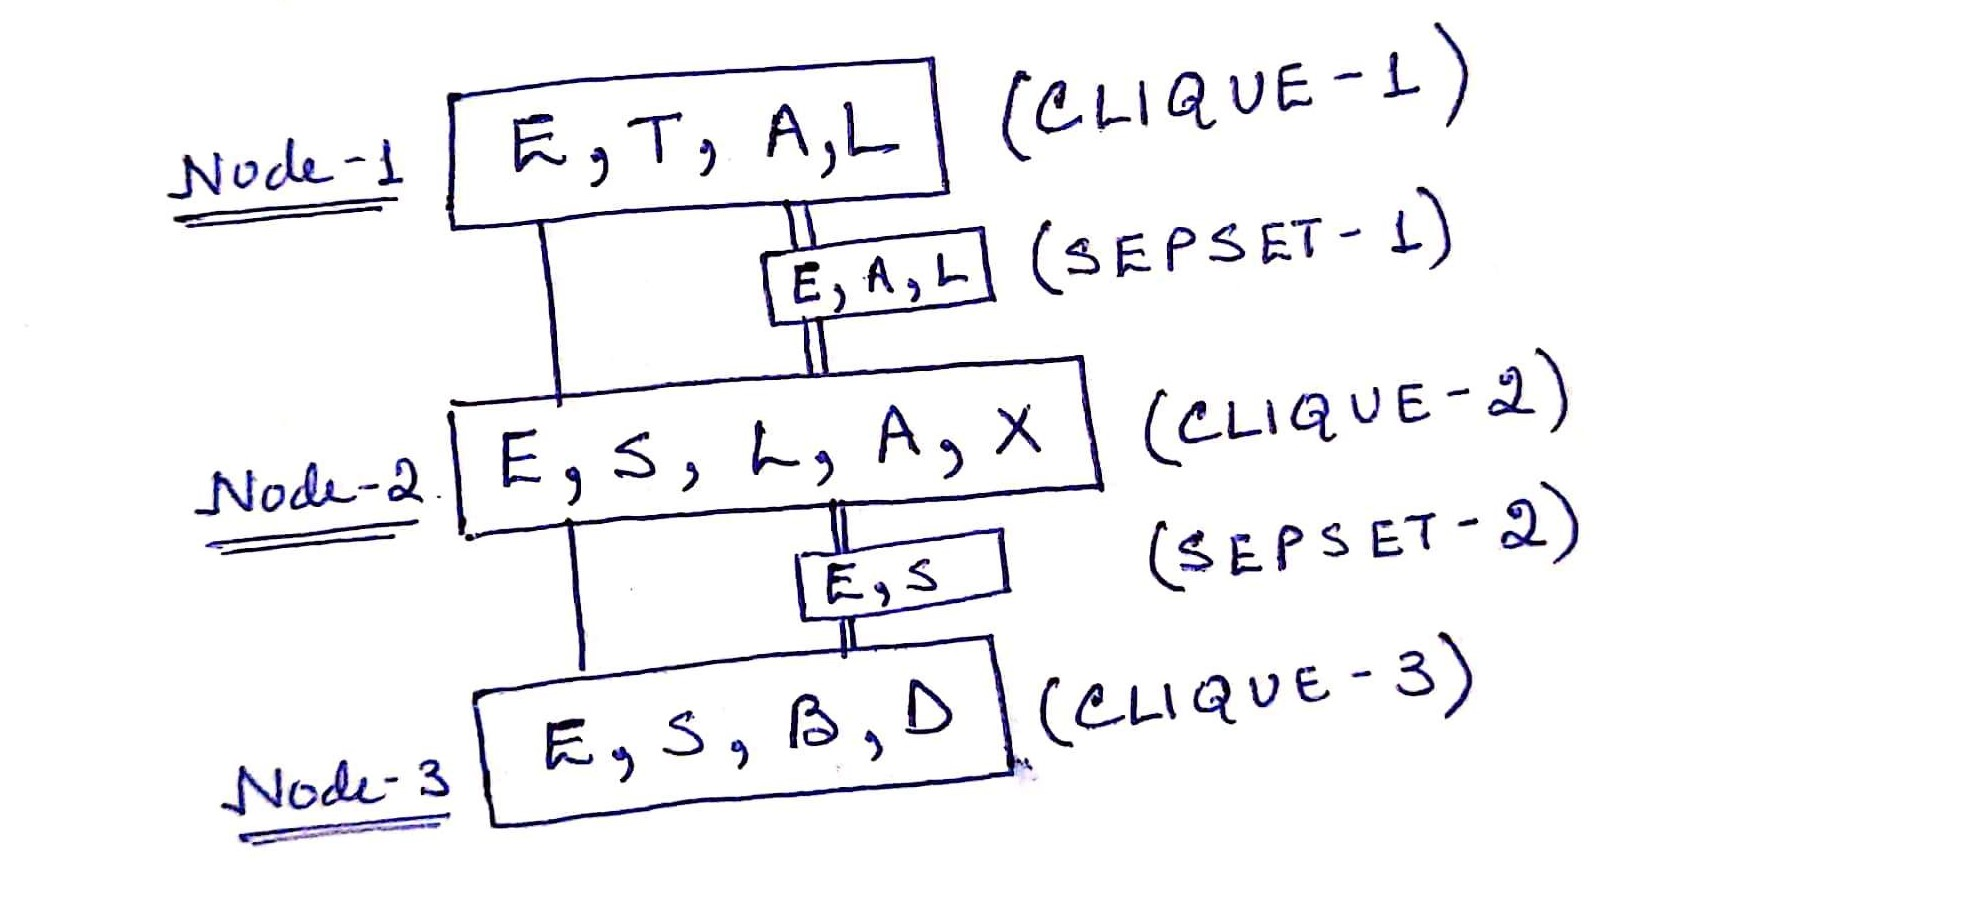

In [21]:
Image(filename = 'cluster_tree.jpg', width = 800, height = 600)

## Message Passing

From our generated cluster tree, we have the following clusters:-
<br><br>
<b>Node1:</b> {'either', 'tub', 'asia', 'lung'} ---> <b>Common(Node1, Node2)</b>: {'either', 'asia', 'lung'} and <b> Marginals</b>: {'tub'}
<br><br>
<b>Node2:</b> {'either', 'smoke', 'lung', 'asia', 'xray'} ---> <b>Common(Node2, Node3)</b>: {'either', 'smoke'} and <b> Marginals</b>: {'lung', 'xray', 'asia'} 
<br><br>
<b>Node3:</b> {'either', 'smoke', 'bronc', 'dysp'} ---> <b>Marginals</b>: {'either', 'smoke', 'bronc', 'dysp'}
<br>

Taking <b>Asia(A), Bronc(B), Dysp(D), Either(E), Lung(L), Smoke(S), Tub(T) and Xray(X),</b>
<br><br>

We represent the graph using the following equation, 
$$p(V ) = p(A)p(T | A)p(S)p(L | S)p(B | S)p(E | T, L)p(D | E, B)p(X | E)$$
<br><br>
The joint probabilty of the model can be written as,
$$\Psi_{1}(E, A, L) = \sum_{T} p(T | A)p(E | T, L)$$<br>
$$\Psi_{2}(S, E) = \sum_{L}\sum_{X}\sum_{A} p(A) p(L | S) p(X | E) \Psi_{1}(E, A, L)$$ <br>
$$\Psi_{3} = \sum_{E}\sum_{S}\sum_{B}\sum_{D} p(S) p(B | S) p(D | E, B) \Psi_{2}(S, E)$$ <br>

In the <b>first iteration</b>, the message is passed from <b>Node 1 to Node 2</b>.<br>
In the <b>second iteration</b>, the message is passed from <b>Node 2 to Node 3</b>.<br>
In the <b>third iteration</b>, the message backpropagates from <b>Node 3 to Node 1.</b><br><br>
Finally, in the end <b>once all the message passing are done, we will be left with only the cluster marginals.</b> 

## Acknowledgements
1. Professor Dong's lecture notes and videos on Graphical Models and Message Passing
2. Building Probabilistic Graphical Models with Python by Kiran R Karkera
3. https://vv.cs.byu.edu/facwiki/scraped-cs677sp10/cs677sp10/index.php/Clique_Trees.html
4. https://ermongroup.github.io/cs228-notes/inference/jt/
5. https://github.com/pgmpy/pgmpy/tree/dev/examples
6. https://github.com/siddheswarc/Pattern-Recognition/tree/master/Project%203
7. https://youtu.be/FDNB0A61PGE